In [47]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from fastai.text import *
import os
import seaborn as sns
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import CountVectorizer

os.chdir("D:/fast_ai/NLP/cap/new_data")

In [4]:
df= pd.read_pickle("cleaned_data_setIII.pkl")

In [150]:
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
#.load('en_core_web_sm')
class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]



vec = CountVectorizer(stop_words="english",ngram_range=(1, 1),lowercase=True,min_df=3)

In [151]:
### perform basic tokenization without stemming; kick out useless stop words and preserve some order with ngrams
## targets a) create a word cloud b) do some topic extraction, c) cluster analysis 
doc_matr1 = vec.fit_transform(df["reviews.text"])



In [104]:
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans

In [159]:
nmf = NMF(n_components=10)


In [160]:
W1 = nmf.fit_transform(doc_matr1)

In [161]:
H1 =nmf.components_



In [162]:
H1.shape, W1.shape

((10, 20840), (114192, 10))

In [163]:
num_top_words=30
def show_topics(h,vocabS=vec.get_feature_names()):
    top_words  = lambda t:[vocabS[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in h])
    return [" ".join(t) for t in topic_words]

In [164]:
len(vec.get_feature_names())


20840

In [314]:

with open(output_path/"m_topix.txt","w") as text_file:
    text_file.write(" ".join(show_topics(H1)))

In [173]:
cfM = KMeans(n_clusters=5)

In [174]:
km = cfM.fit(W1)

In [175]:
clus = km.fit_predict(W1)

In [176]:
from collections import defaultdict
out = defaultdict()
for i in set(clus):
    out[i] = pd.value_counts(np.array(df["reviews.rating"])[clus==i],normalize=True)


In [177]:
%matplotlib inline
from pathlib import Path

In [178]:
#for consistent plotting 
output_path = Path("D:/fast_ai/NLP/cap/plots")
mpl.style.use("seaborn-whitegrid")
params = {'axes.titlesize':'32',
          'xtick.labelsize':'14',
          'ytick.labelsize':'14',
          'legend.loc':'upper right'}
mpl.rcParams.update(params)

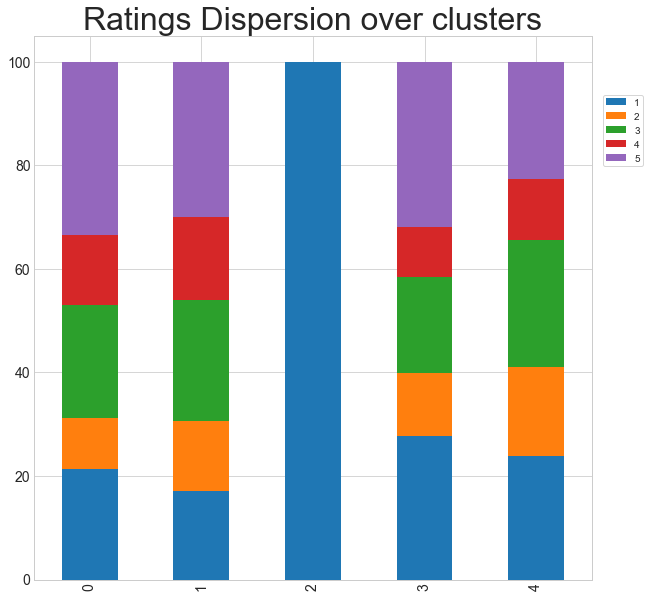

In [305]:
axx = (pd.DataFrame(out).T*100).plot(kind="bar",stacked=True,figsize=(10,10),title="Ratings Dispersion over clusters")
axx.legend(loc="upper right",frameon=True,borderpad=.3,bbox_to_anchor=(1.1,.9))
plt.savefig(output_path/"clusterS.png")

In [256]:
most_frequent_words = doc_matr1.sum(axis=0)
vocabS = vec.get_feature_names() 


In [257]:

ix = pd.DataFrame(most_frequent_words).idxmax()

In [290]:
most_common = np.argsort(most_frequent_words)[-50:]


In [291]:
#most_frequent_words = most_frequent_words.tolist()[0]

most_common_vocabs = [vocabS[i] for i in most_common.tolist()]

In [292]:
frequencies = [most_frequent_words[i] for  i in most_common.tolist()]

In [296]:
most_common_vocabs


['make',
 'tablet',
 'computer',
 'amazon',
 'recommend',
 'games',
 'didn',
 'using',
 've',
 'money',
 'nice',
 'used',
 'new',
 'need',
 'doesn',
 'want',
 'way',
 'price',
 'little',
 'quality',
 'bought',
 'better',
 'easy',
 'got',
 'did',
 'battery',
 'screen',
 'buy',
 'does',
 'kindle',
 'works',
 'product',
 '34',
 'fun',
 'case',
 'play',
 'love',
 'don',
 'really',
 'work',
 'time',
 'app',
 'use',
 'camera',
 'good',
 'great',
 'just',
 'like',
 'game',
 'br']

In [293]:
## generate text for word cloud 
start_text = ".."
for i,k in zip(frequencies,most_common_vocabs):
    most_words = np.repeat(k,i).tolist()
    start_text = start_text + " ".join(most_words)
    
    

    


In [286]:
#start_text 


In [302]:
from wordcloud import WordCloud

wordcloud = WordCloud(max_font_size=50,background_color="white").generate(start_text)

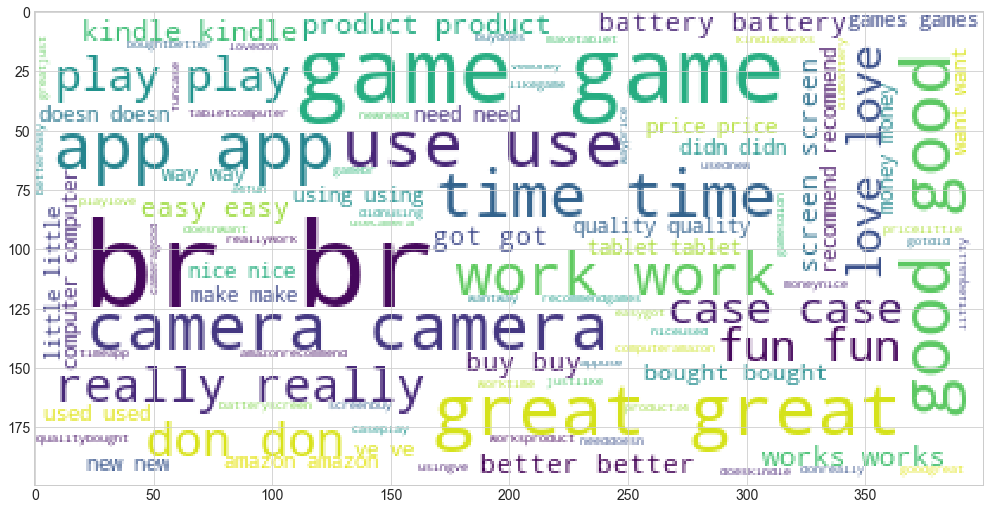

In [308]:
plt.figure(figsize=[17,17])
plt.imshow(wordcloud)
plt.savefig(output_path/"wordcloud.png")

In [330]:
av = doc_matr1[:,vocabS.index("br")]
av1 = av[av>100]
df["reviews.text"].iloc[av1.tolist()[0][1]]


"Not worth it.  I did have mine since 2010, purchased directly from the company, but it just stopped working now.  Something like this should not just go dead on you.  It only has a 2 year warranty which speaks for itself about what they think it's lifespan is.<br /><br />I had been using this with lastpass and as a fixed password for certain applications like Truecrypt.  I'm glad I saved that fixed password separately or I would have never gotten into those files again."